# Exploratory Data Analysis

## 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline #구버전 주피터에 있어야 보여

In [5]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_null = df.isnull()
# df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#df.describe("object") 
#0인 값 = 결측치를 의미할 거라는 생각하기
df.describe(include='number') #include object 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 학습/예측 칼럼 만들기 
 - 가장 마지막에 있는 'Outcome'은 label값

In [8]:
df.columns[0:-1] #-1번째 제외 (마지막에서 2번째 열까지)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화
인슐린 혈압 등의 값은 0 값이 결측치라고 볼 수 있음  
따라서 0 값을 결측치로 처리하고 시각화

In [10]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
#0값을 결측치라 가정
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [12]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

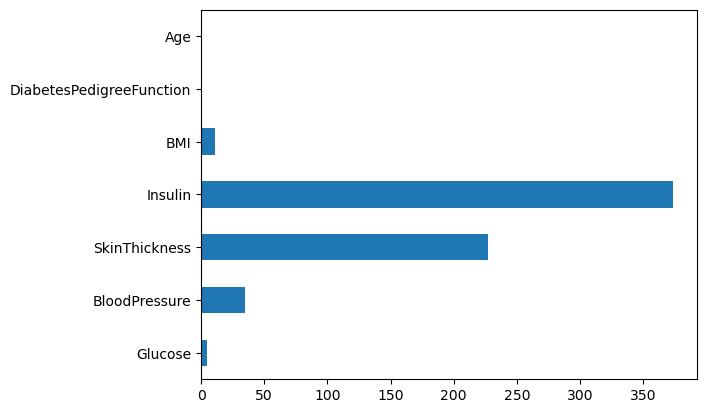

In [13]:
df_null.sum().plot.barh()

<Axes: >

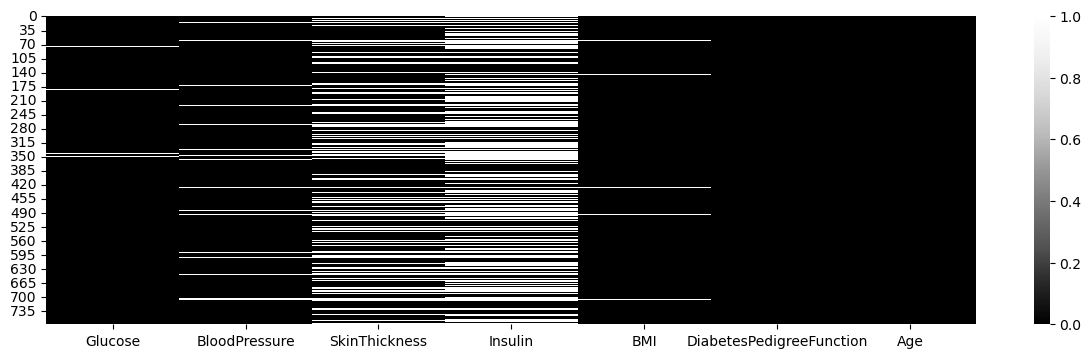

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r') 

# 정답값 (target, label)

In [15]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## 임신횟수와 정답값을 비교

In [17]:
#인덱스에 올 값을 groupby [] 란에 쓴다
#그 뒤에는 value에 올값을 쓴다
#aggregation에는 여러개의 연산

df_po = df.groupby(["Pregnancies"])['Outcome'].agg(['mean', 'count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

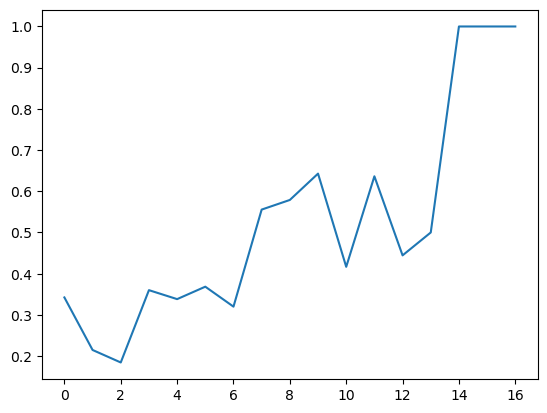

In [18]:
df_po['mean'].plot()

<Axes: >

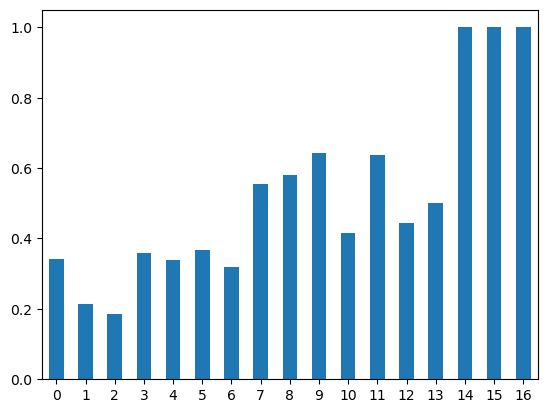

In [19]:
df_po['mean'].plot.bar(rot=0) #임신 횟수에 따른 발병 비율

# countplot: categorical values

<Axes: xlabel='Outcome', ylabel='count'>

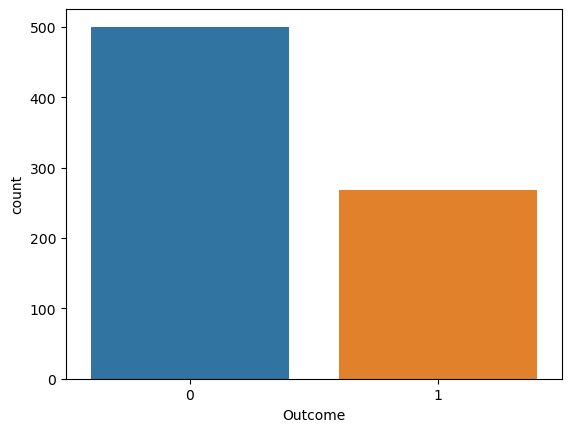

In [20]:
sns.countplot(data=df, x='Outcome')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

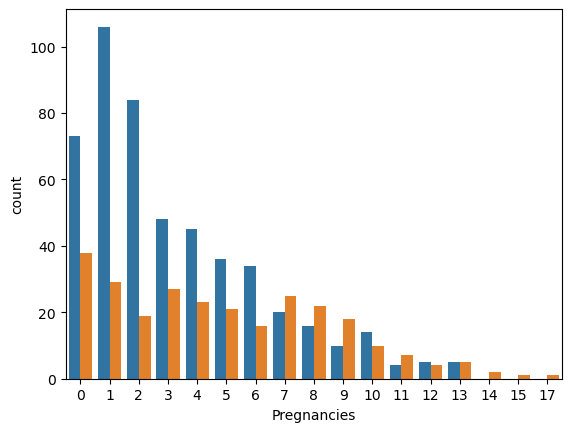

In [21]:
#임신횟수에 따른 당뇨병 발병 빈도수를 비교
sns.countplot(data=df, x='Pregnancies', hue = 'Outcome')

In [ ]:
df['Pregnancies_high'] = df['Pregnancies'] > 6 #onehot encoding
df[['Pregnancies','Pregnancies_high']].head()

In [ ]:
sns.countplot(data=df, x = 'Pregnancies_high', hue ='Outcome')

# barplot

In [ ]:
sns.barplot(data=df, x ='Outcome', y='BMI') #당뇨병 발병에 따른 BMI 수치를 비교합니다.

In [ ]:
sns.barplot(data=df, x ='Outcome', y='Glucose') #당뇨병 발병에 따른 포도당 glucose 수치를 비교

In [ ]:
sns.barplot(data=df, x='Outcome', y = 'Insulin') #Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교
#검은색 막대 : bootstrap sampling -> 95% 신뢰구간의 값의 범위 

In [ ]:
sns.barplot(data=df, x='Pregnancies', y='Outcome') #임신횟수에 대해서 당뇨병 발병 비율을 비교

In [ ]:
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome') #임신횟수에 따른 포도당 수치 를 발병여부에 따라 시각화

In [ ]:
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome') #임신횟수에 따른 체질량지수(BMI)  를 발병여부에 따라 시각화

In [ ]:
sns.barplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome') #임신횟수에 따른 인슐린 수치 를 발병여부에 따라 시각화
#인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다. 

In [ ]:
sns.barplot(data=df[df['Insulin']>0], x = 'Pregnancies', y='Insulin', hue='Outcome')

# boxplot

In [ ]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화 
#인슐린 수치에는 결측치가 많아 -> 0 보다 큰 값에 대해서만 그리기


sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome') 

# violinplot

In [ ]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome',
              split=True) #두 파트로 좌우로 데이터를 나눠보기 위해 split옵션을 지정

# swarmplot

In [ ]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

# distplot: 연속된 수치형 데이터

In [ ]:
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]
df_0.shape, df_1.shape

In [ ]:
#임신횟수에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

#5라는 임신숫자를 기준으로 5 이후에는 발병 횟수가 더 많다

In [ ]:
#나이에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False,  rug=True, label=1)

# Subplots

## Pandas를 통한 histplot 그리기
- pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.

In [ ]:
#df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize=(15,15), bins=20)

## 반복문을 통한 서브플롯 그리기

### distplot

In [ ]:
#컬럼 수 만큼 for문을 만들어서 서브플롯 시각화
col_num = df.columns.shape
col_num

In [ ]:
cols = df.columns[:-1].tolist()
cols

In [ ]:
#distplot으로 서브플롯을 그리기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols): #enumerate: index값과 value값을 같이 가지고 오게 됨
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

In [ ]:
#모든 변수에 대한 distplot을 그려 봅시다
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))


#Outcome 값을 빼고 그릴 것
for i, col_name in enumerate(cols[:-1]): #enumerate: index값과 value값을 같이 가지고 오게 됨
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

### violinplot

In [ ]:
# violinplot으로 서브플롯을 그려봅니다.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]): #enumerate: index값과 value값을 같이 가지고 오게 됨
    row = i // 2
    col = i % 2
    sns.violinplot(data = df, 
                       x='Outcome', 
                       y=col_name,
                       ax=axes[row][col])

### lmplot
- 상관계수가 높은 두 변수에 대해 시각화

In [ ]:
sns.regplot(data=df,
               x='Glucose',
               y='Insulin')

In [ ]:
#regplot에서는 hue색상지정이 안되지만 lmplot은 가능!
sns.lmplot(data=df, 
              x='Glucose',
              y='Insulin',
              hue='Outcome')

In [ ]:
#Insulin 수치가 0이상인 데이터로만 그려보기
sns.lmplot(data = df[df['Insulin']>0], 
              x='Glucose',
              y='Insulin',
              hue='Outcome')

### pairplot

In [ ]:
#모든 변수에 대해 Outcome에 따른 scatterplot

#sns.pairplot(df)
g = sns.PairGrid(data=df, hue='Outcome')
g.map(plt.scatter)

# 상관분석

In [6]:
df_matrix = df.iloc[ : , :-2].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,1


In [7]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.173844
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,1.000000


In [18]:
print(sns.__version__)

0.12.2


<Axes: >

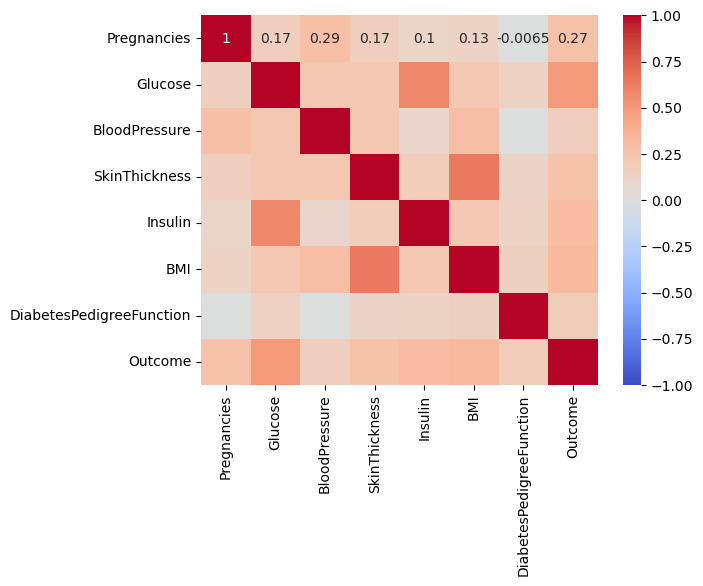

In [19]:
sns.heatmap(df_corr, annot=True, vmax=1, vmin = -1, cmap="coolwarm")

In [10]:
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관계수가 높은 변수끼리 보기

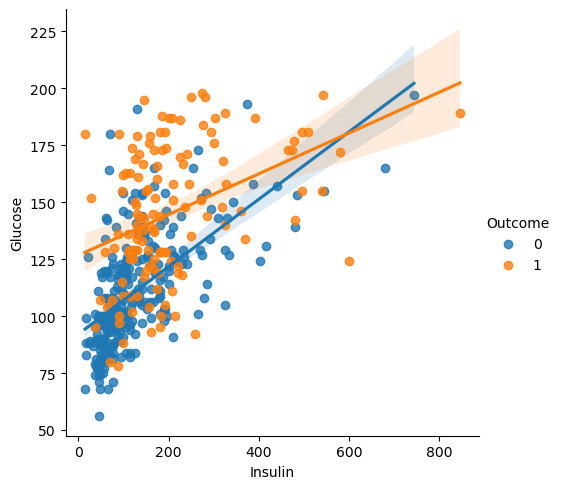

In [14]:
sns.lmplot(data=df_matrix,
              x= 'Insulin',
              y='Glucose', hue='Outcome')

<Axes: xlabel='Insulin', ylabel='Glucose'>

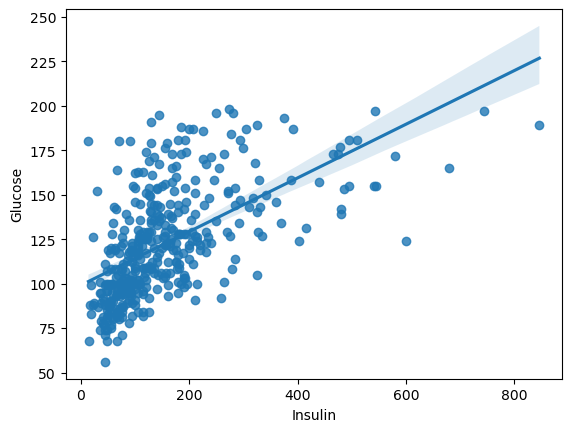

In [11]:
sns.regplot(data=df_matrix,
               x ='Insulin',
               y='Glucose')

In [ ]:
sns.regplot(data=df_matrix,
               x='Age',
               y='Pregnancies')

In [ ]:
sns.lmplot(data=df,
                x='Age',
                y='Pregnancies',
              hue='Outcome', col='Outcome')